In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Linearly separable case

In [ ]:
nbpts1 = 50 # Number of points in first cluster (vary to explore effect of number of points)
mu1 = [-2,4] # the mean of the first cluster (this is a vector as we are in 2D) -- move it around
sigma1 = [[1.5,0],[0,1.9]] # the covariance matrix of the first cluster -- this one is not correlated
data1 = np.random.multivariate_normal(mu1,sigma1,nbpts1) #

nbpts2 = 50 # Number of points in second cluster (vary to explore effect of number of points)
mu2 = [1,-3] # the mean of the second cluster (this is a vector as we are in 2D) -- move it around
sigma2 = [[1.2,0.2],[0.2,2.3]] # the covariance matrix of the second cluster -- this one is correlated
data2 = np.random.multivariate_normal(mu2,sigma2,nbpts2) #

data = np.concatenate((data1,data2),axis=0) # Concatenate the data by row

In [ ]:
# Normalise - let's deal with pre-processing straight up here. In general you do it after you've received the data!
data= (data-np.mean(data,0))/np.std(data,0);

# Assign class labels.
classes = np.concatenate([np.zeros(nbpts1,dtype=int),np.ones(nbpts2,dtype=int)]) #integers

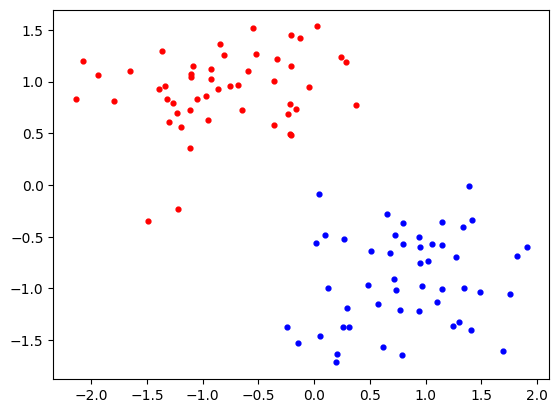

In [ ]:
# Plot the data, different colours for each class
plt.figure(1)

plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=12)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=12)
axes = plt.gca()
(x_min,x_max) = axes.get_xlim()
(y_min,y_max) = axes.get_ylim()

Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron() # Default without option: This will return a warning on max_iter and tol -- adjust to your liking
# You should check what the defaults are. For example, alpha=0.0001 but alpha is regularisation which is not something we discussed in the context of Perceptron. The learning rate eta0 = 1.

clf.fit(data,classes) # Learning.

Perceptron()

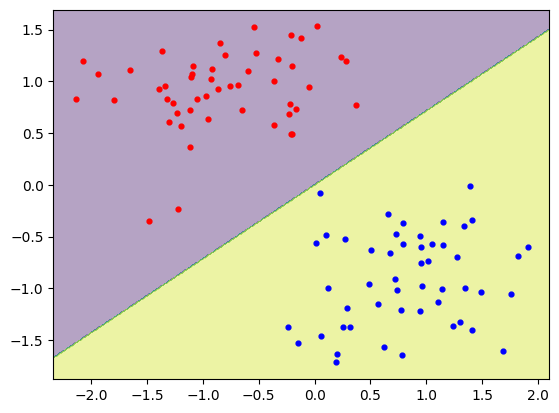

In [ ]:
#Plotting decision regions

# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4) # Will reveal decision boundary
plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=12)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=12)

SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#clf=SVC(kernel='linear',C=np.inf)

# If the above line gives you an error message (which it does in some versions of Python),
# then use the following line instead:

clf=SVC(kernel='linear',C=1000000)

In [ ]:
clf.fit(data,classes)

SVC(C=1000000, kernel='linear')

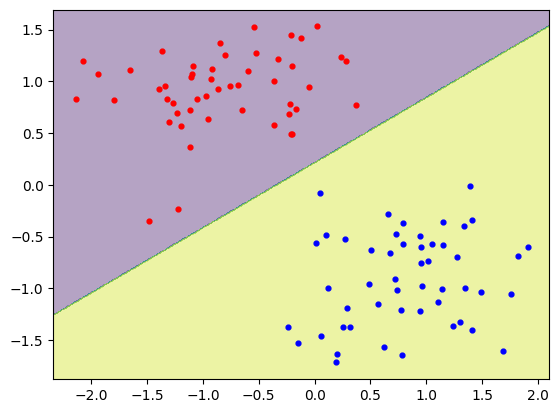

In [ ]:
# Plotting decision regions

# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4) # Will reveal decision boundary
plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=12)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=12)

#plt.show()

This plot looks much more like the optimal solution.

# 2. Non-linearly separable case 1

This is how the data were generated

In [ ]:
nbpts1 = 50 # Number of points in first cluster (vary to explore effect of number of points)
mu1 = [-2,2] # the mean of the first cluster (this is a vector as we are in 2D) -- move it around
sigma1 = [[1.5,0],[0,1.9]] # the covariance matrix of the first cluster -- this one is not correlated
data1 = np.random.multivariate_normal(mu1,sigma1,nbpts1) #

nbpts2 = 50 # Number of points in second cluster (vary to explore effect of number of points)
mu2 = [2,-2] # the mean of the second cluster (this is a vector as we are in 2D) -- move it around
sigma2 = [[1.2,0.2],[0.2,2.3]] # the covariance matrix of the second cluster -- this one is correlated
data2 = np.random.multivariate_normal(mu2,sigma2,nbpts2) #

data = np.concatenate((data1,data2),axis=0) # Concatenate the data by row

Load the data you used

In [ ]:
data=np.load('data1.npy')
classes=np.load('classes1.npy')

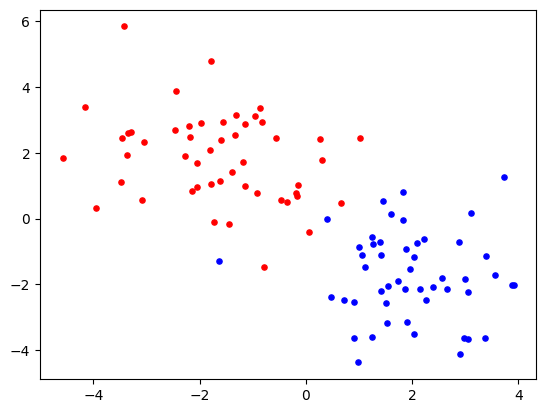

In [ ]:
# Plot the data, different colours for each class
plt.figure(1)

plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=14)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=14)
axes = plt.gca()
(x_min,x_max) = axes.get_xlim()
(y_min,y_max) = axes.get_ylim()

## Prioritising large margin separating majority of data points:

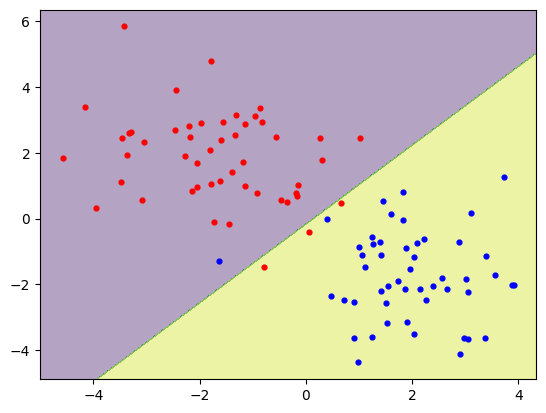

In [ ]:
clf=SVC(kernel='linear',C=0.01)
clf.fit(data,classes)

#Plotting decision regions

# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4) # Will reveal decision boundary
plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=12)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=12)

Here the decision boundary is roughly midway between the two main clusters of points, but there are 4 points classified incorrectly and 5 points very close to the decision boundary.

## Prioritising points being on correct side of margin:

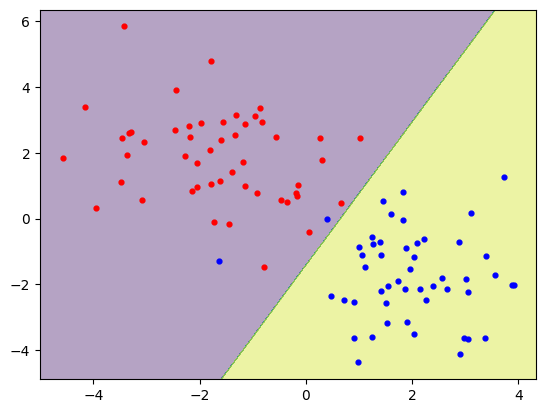

In [ ]:
clf=SVC(kernel='linear',C=100)
clf.fit(data,classes)

#Plotting decision regions

# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4) # Will reveal decision boundary
plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=12)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=12)

Here the decision boundary has ended up closer to the blue cluster, but only 2 points are classified incorrectly, and there are only really 3 points very close to the decision boundary.

# 3. Non-linearly separable case 2


In [ ]:
def distance_feature(x1,x2):   # this function computes the distance of a point from (x1,x2)=(5,5)
    return np.sqrt((x1-5)**2+(x2-5)**2)

In [ ]:
nbpts=100

classes=np.zeros(nbpts)
data=np.random.uniform(low=0,high=10,size=(nbpts,2))
for i in range(nbpts):
    d=distance_feature(data[i,0],data[i,1])
    if d<3:
        classes[i]=1
    else:
        classes[i]=0

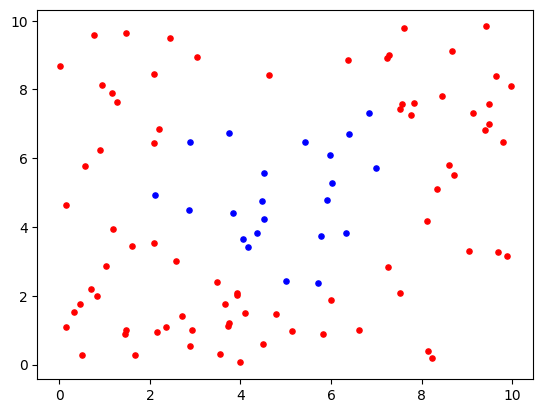

In [ ]:
plt.figure(1)

plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=14)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=14)
axes = plt.gca()
(x_min,x_max) = axes.get_xlim()
(y_min,y_max) = axes.get_ylim()

In [ ]:
X=np.zeros((nbpts,3))
X[:,0:2]=data
X[:,2]=distance_feature(data[:,0],data[:,1])


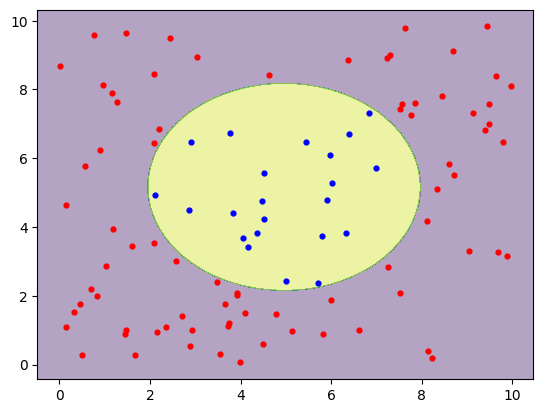

In [ ]:
clf=SVC(kernel='linear',C=100)
clf.fit(X,classes)

#Plotting decision regions

# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
zz=distance_feature(xx.ravel(), yy.ravel())
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4) # Will reveal decision boundary
plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=12)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=12)

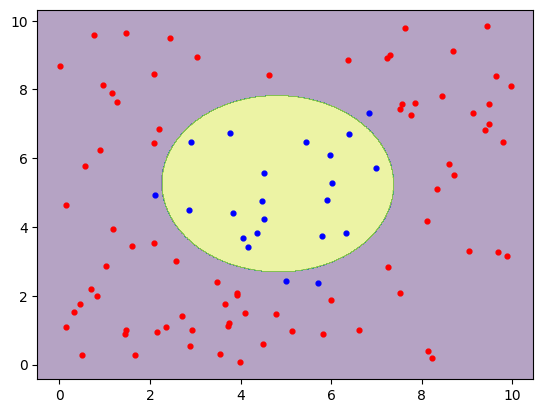

In [ ]:
clf=SVC(kernel='linear',C=0.05)
clf.fit(X,classes)

#Plotting decision regions

# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
zz=distance_feature(xx.ravel(), yy.ravel())
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4) # Will reveal decision boundary
plt.scatter(data[classes == 0, 0], data[classes ==0 , 1],c='red',s=12)
plt.scatter(data[classes == 1, 0], data[classes ==1 , 1],c='blue',s=12)

The decision boundary moves in towards the centre. There are more data points further out, so you get fewer points close to the boundary if it shrinks in towards the centre.